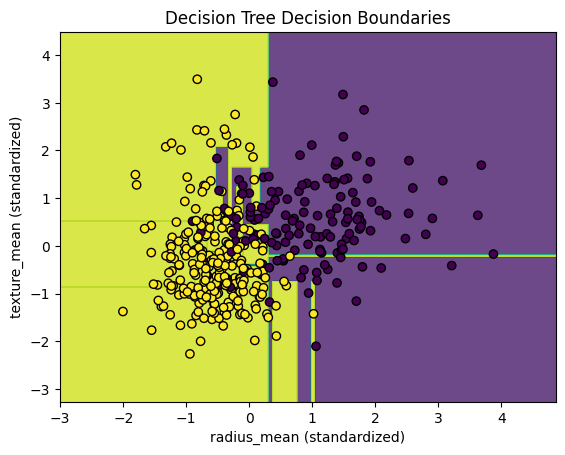

Score: 0.8596491228070176
Training set score: 1.0000
Test set score: 0.8596
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81        63
           1       0.89      0.89      0.89       108

    accuracy                           0.86       171
   macro avg       0.85      0.85      0.85       171
weighted avg       0.86      0.86      0.86       171

[[51 12]
 [12 96]]


<Axes: >

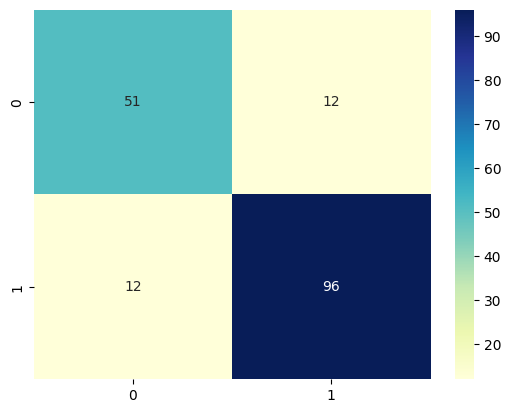

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('data1.csv')
df = df.drop(['Unnamed: 32'], axis=1)
df['diagnosis'] = df['diagnosis'].replace({'M': 0, 'B': 1})

X = df.drop(['id','diagnosis'], axis=1)
y = df['diagnosis']
X = X[['radius_mean','texture_mean']]


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Scaling the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)


# Plotting the decision boundaries
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
pred = pred.reshape(xx.shape)

plt.contourf(xx, yy, pred, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o')
plt.title("Decision Tree Decision Boundaries")
plt.xlabel("radius_mean (standardized)")
plt.ylabel("texture_mean (standardized)")
plt.show()

# Classification report and confusion matrix
y_pred = clf.predict(X_test)
print("Score:", clf.score(X_test, y_test))
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
print("Classification Report:\n", classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
import seaborn as sbs
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
sbs.heatmap(confusion_matrix, annot=True, fmt='d', cmap='YlGnBu')



In [17]:
# Grid Search for best parameters
#find the best cv
from sklearn import model_selection

list = []
for i in range(2,20):
  kfold = model_selection.KFold(n_splits=i)
  modelCV = clf
  scoring = 'accuracy'
  results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
  list.append(results.mean())

df = pd.DataFrame({'Number of splits': range(2, 20), 'Score': list})

indice_max = df['Score'].idxmax()
fila_max = df.loc[indice_max]
print(fila_max)


param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=17)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_clf = grid_search.best_estimator_
y_pred_best = best_clf.predict(X_test)

print("Score with best parameters:", best_clf.score(X_test, y_test))
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
print(classification_report(y_test, y_pred_best))
best_clf = grid_search.best_estimator_






## Gradient Boosting Decision Tree

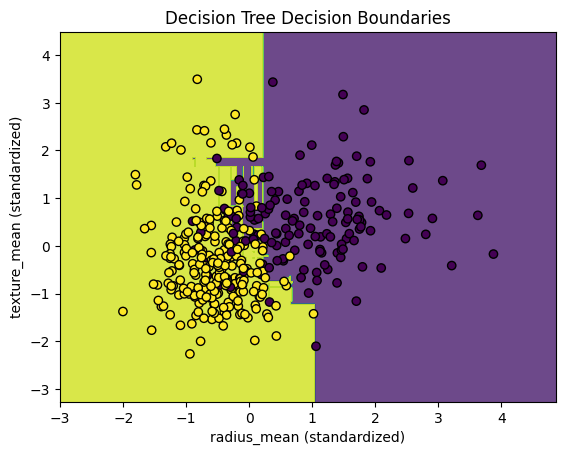

Score: 0.9064327485380117
Training set score: 0.9749
Test set score: 0.9064
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.87        63
           1       0.92      0.94      0.93       108

    accuracy                           0.91       171
   macro avg       0.90      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171

[[ 54   9]
 [  7 101]]
Best Parameters: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100}
Score of Best Estimator: 0.8771929824561403
Classification Report for Best Estimator:
               precision    recall  f1-score   support

           0       0.86      0.79      0.83        63
           1       0.88      0.93      0.90       108

    accuracy                           0.88       171
   macro avg       0.87      0.86      0.87       171
weighted avg       0.88      0.88      0.88       171

Training set score: 0.9749
Test set score: 0.9064


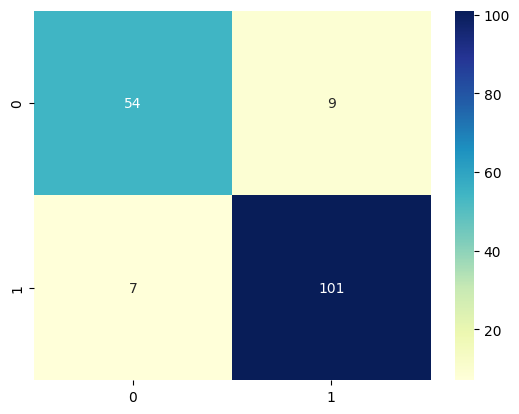

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the dataset (using two variables for visualization)
df = pd.read_csv('data1.csv')
df = df.drop(['Unnamed: 32'], axis=1)
df['diagnosis'] = df['diagnosis'].replace({'M': 0, 'B': 1})

X = df.drop(['id','diagnosis'], axis=1)
y = df['diagnosis']
X = X[['radius_mean','texture_mean']]


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Scaling the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train a Decision Tree classifier
clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, y_train)


# Plotting the decision boundaries
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
pred = pred.reshape(xx.shape)

plt.contourf(xx, yy, pred, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o')
plt.title("Decision Tree Decision Boundaries")
plt.xlabel("radius_mean (standardized)")
plt.ylabel("texture_mean (standardized)")
plt.show()

# Classification report and confusion matrix
y_pred = clf.predict(X_test)
print("Score:", clf.score(X_test, y_test))
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
print("Classification Report:\n", classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
import seaborn as sbs
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
sbs.heatmap(confusion_matrix, annot=True, fmt='d', cmap='YlGnBu')


# 5. Grid Search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
    'max_depth': [1, 2, 3, 4, 5]
}

grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 6. Evaluate Best Model
best_clf = grid_search.best_estimator_
y_pred_best = best_clf.predict(X_test)
print("Best Parameters:", grid_search.best_params_)
print("Score of Best Estimator:", best_clf.score(X_test, y_test))
print("Classification Report for Best Estimator:\n", classification_report(y_test, y_pred_best))
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

plt.show()





